/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


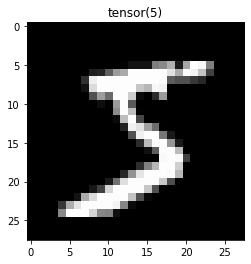

torch.Size([60000, 28, 28])

In [1]:
from pathlib import Path
from utils.dataset import MnistHandWroteNumber

training_datas, size = MnistHandWroteNumber.download(Path("./data/"))
size

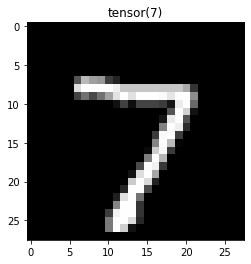

torch.Size([10000, 28, 28])

In [2]:
test_datas, size = MnistHandWroteNumber.download(Path("./data/"), train=False)
size

In [3]:
from base.classifier import CNN, training


cnn = CNN()
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [4]:
training(cnn, training_datas, test_datas)

/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/shemyu/Documents/programing/hwnum_model/src/base/classifier.py:46: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  Variable(torch.unsqueeze(test_datas.test_data, dim=1), volatile=True).type(
/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number